First of all, we need to import the libraries we need and the load the scaled dataset from the previous notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
car_kick=pd.read_csv('car_kick4.csv')
car_kick.head()

,Age,Mileage,Price,WarrantyCost,price_ratio,IsOnlineSale,Class,Auction_Adesa,Auction_Manheim,Auction_Other,...,State_OK,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV
0,-0.099151,-1.375443,-0.167113,-0.333637,-0.641444,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.099151,1.209000,-1.040398,-0.512020,0.768570,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.684799,-0.032433,0.364368,1.204268,1.121073,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.270448,0.806522,0.546765,1.512542,-0.553318,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.270448,-0.906568,0.993562,0.383359,1.209199,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


The first method that we'll use for our classification problem is Logistic Regression. We need to split our dataset into training and test sets first.

In [3]:
X=car_kick.drop('Class', axis=1)
y=car_kick['Class']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [4]:
y_train.value_counts(normalize=True)

0    0.906247
1    0.093753
Name: Class, dtype: float64

In [5]:
y_test.value_counts(normalize=True)

0    0.90675
1    0.09325
Name: Class, dtype: float64

As we can see in both training and test datas the distribution of target value is the same. Now let's create a Logistic Regression object with default parameters.

In [7]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("The accuracy of the model on the training data is : {}".format(train_score))
print("The accuracy of the model on the test data is : {}".format(test_score))

The accuracy of the model on the training data is : 0.9063071757444157
The accuracy of the model on the test data is : 0.906628867844864


We have good accuracy result for both training and test datasets. But considering the fact that our dataset is higly imbalanced the accuracy is a poor metric to evaluate the model, so we'll create a confusion matrix for our model.

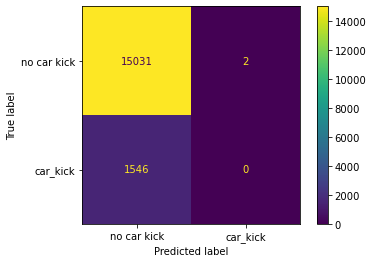

In [8]:
cm=metrics.confusion_matrix(y_test, y_pred, labels = lr.classes_)

display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no car kick', 'car_kick'])
display_cm.plot()
plt.show()

In [29]:
y_pred_tr=lr.predict(X_train)

train_roc_score=metrics.roc_auc_score(y_train, y_pred_tr)
test_roc_score=metrics.roc_auc_score(y_test, y_pred)

print('The ROC AUC score of the model on the train data is : {}'.format(round(train_roc_score, 4)))
print("The ROC AUC score of the model on the test data is : {}".format(round(test_roc_score, 4)))

The ROC AUC score of the model on the train data is : 0.4999
The ROC AUC score of the model on the test data is : 0.5016


C:\Users\sirak\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


As we can see our model performs poorly on our test data, out of 1565 car kicks only 2 were predicted. On the EDA step of the project we saw that there were no significant linear relationship between the target variable and the features, however we'll try to tune our hyperparamters: we'll use the 'saga' algorithm for solver parameter considering the large size of our dataset. And for the scoring we'll use ROC AUC score because it'll work better on our imbalanced dataset.

In [13]:
clf=LogisticRegression(max_iter = 5000, solver='saga')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred_tr=clf.predict(X_train)

train_roc_score=metrics.roc_auc_score(y_train, y_pred_tr)
roc_score=metrics.roc_auc_score(y_test, y_pred)

print('The ROC AUC score of the model on the train data is : {}'.format(round(train_roc_score, 4)))
print('The ROC AUC score of the model on the test data is {}'.format(round(roc_score, 4)))

The ROC AUC score of the model on the train data is : 0.5007
The ROC AUC score of the model on the test data is 0.4999


The model didn't improve after changing the parameters. </br>
The next model that we'll use is Decision Trees with max depth of 5. Then we'll compare the results with Logistic Regression and choose the best model for our data.For the decision trees we don't need to scale the data, so we'll use the unscaled dataset from the previous notebook.

In [14]:
df=pd.read_csv('car_kick5.csv')
df.head()

,Age,Mileage,Price,WarrantyCost,IsOnlineSale,Class,price_ratio,Auction_Adesa,Auction_Manheim,Auction_Other,...,State_OK,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV
0,4,51954,7062.0,1086.0,0,0,0.68,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,89127,4783.0,983.0,0,0,0.84,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,71271,8449.0,1974.0,0,0,0.88,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,83338,8925.0,2152.0,0,0,0.69,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,58698,10091.0,1500.0,0,0,0.89,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
X=df.drop('Class', axis=1)
y=df['Class']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [16]:
dtm = DecisionTreeClassifier(max_depth= 5)

dtm.fit(X_train, y_train)
y_pred=dtm.predict(X_test)
y_pred=pd.Series(y_pred)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("ROC AUC score:", metrics.roc_auc_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Accuracy: 0.9020469596628538
ROC AUC score: 0.500448941179255
Precision score 0.2857142857142857
Recall score 0.0012315270935960591


The Decision tree Classifier also performs poorly on our data, we have almost the same results. However we can try to tune our hyperparameters: changing max depth and criterion for it using Grid Search.

In [17]:
dt=DecisionTreeClassifier()
params={'max_depth': [10, 15, 25, 35], 'criterion':['gini', 'entropy']}

gs_dt=GridSearchCV(dt, param_grid=params, scoring='roc_auc', cv=5)
gs_dt.fit(X_train, y_train)

print('best score on the train data {}'.format(round(gs_dt.best_score_, 4)))
print('params for the best score {}'.format(gs_dt.best_params_))
gs_dt_test=gs_dt.score(X_test, y_test)
print('best score on the test data {}'.format(round(gs_dt_test, 4)))

best score on the train data 0.6391
params for the best score {'criterion': 'gini', 'max_depth': 10}
best score on the test data 0.642


So, we have the best parameters for the Decision Tree model (criterion: 'gini' and max depth : 10) and much better results than the Logistic Regression model. Now we ban plot the ROC AUC curve to gain a better understanding of our model.

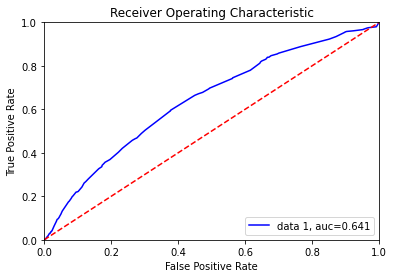

In [46]:
ndt=DecisionTreeClassifier(criterion='gini', max_depth=10)
ndt.fit(X_train, y_train)
y_pred=ndt.predict(X_test)
y_pred_proba = ndt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="data 1, auc="+str(round(auc, 3)))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

recall score:0.0099
ROC AUC score:0.5012
Precision score:0.125


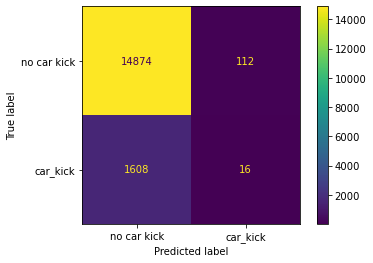

In [47]:
print("recall score:{}".format(round(metrics.recall_score(y_test,y_pred), 4)))
print("ROC AUC score:{}".format(round(metrics.roc_auc_score(y_test,y_pred), 4)))
print("Precision score:{}".format(round(metrics.precision_score(y_test,y_pred), 4)))

cm=metrics.confusion_matrix(y_test, y_pred, labels = ndt.classes_)

display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no car kick', 'car_kick'])
display_cm.plot()
plt.show()

The confusion matrix shows that even though the roc auc score is higher than in case of the previous models, the base threshold value of 0.5 doesn't work well for car kicks: only 1% of the car kick cases were predicted right. We need to find the optimal threshold where the recall  value for car kicks is the highest. In order to do that we'll use a metric called the Youden’s J statistic.
The statistic is calculated as:</br>
J = Sensitivity + Specificity – 1</br>
Which we can restate as:</br>
J = TruePositiveRate – FalsePositiveRate

In [49]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold={}'.format(round(best_thresh, 4)))

Best Threshold=0.0909


Then, we'll build a new model based on this threshold and evaluate it using the roc auc score and recall again.

recall score:0.5954
ROC AUC score:0.6091
Precision score:0.1461


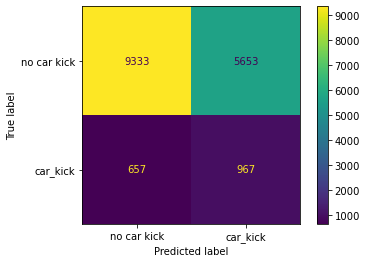

In [50]:
y_pred = (ndt.predict_proba(X_test)[:,1] >= best_thresh).astype(bool)
print("recall score:{}".format(round(metrics.recall_score(y_test,y_pred), 4)))
print("ROC AUC score:{}".format(round(metrics.roc_auc_score(y_test,y_pred), 4)))
print("Precision score:{}".format(round(metrics.precision_score(y_test,y_pred), 4)))

cm=metrics.confusion_matrix(y_test, y_pred, labels = ndt.classes_)
display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no car kick', 'car_kick'])
display_cm.plot()
plt.show()

We found the best threshold of 0.0909 for our model where the recall is 0.5954, so 59% of the car kick values were predicted right. We can plot the threshold on our roc auc curve for better understading.

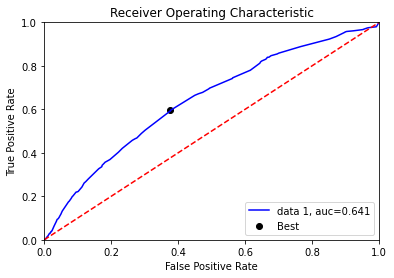

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label="data 1, auc="+str(round(auc, 3)))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()